In [1]:
import sys
import torch

sys.path.append("..")

device = "cuda" if torch.cuda.is_available() else "cpu"

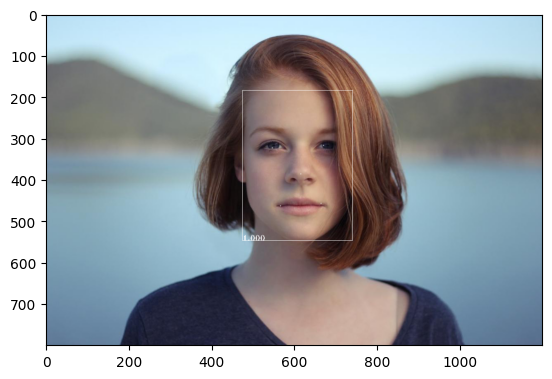

In [2]:
import facer

# image: 1 x 3 x h x w
image = facer.hwc2bchw(facer.read_hwc("data/girl.jpg")).to(device=device)

face_detector = facer.face_detector("retinaface/mobilenet", device=device)
with torch.inference_mode():
    faces = face_detector(image)

facer.show_bchw(facer.draw_bchw(image.clone(), faces))

In [3]:
face_attr = facer.face_attr("farl/celeba/224", device=device)

In [4]:
with torch.inference_mode():
    faces = face_attr(image, faces)

In [5]:
labels = face_attr.labels
face1_attrs = faces["attrs"][0] # get the first face's attributes

print(labels)

for prob, label in zip(face1_attrs, labels):
    if prob > 0.5:
        print(label, prob.item())

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
Attractive 0.6190980672836304
Blond_Hair 0.6993014812469482
No_Beard 0.9983661770820618
Pale_Skin 0.7124271988868713
Straight_Hair 0.5004726648330688
Young 0.973707377910614
